In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

In [ ]:
hth = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ITB/health_data.csv", encoding = 'utf-8')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
display(hth.head()) 
print(hth.info())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,1,1,127.0,79.0,90.0,188.0,58.0,58.0,118.0,15.0,1.0,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,1,1,110.0,73.0,87.0,NaN,NaN,NaN,NaN,12.7,1.0,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,1,1,123.0,80.0,102.0,NaN,NaN,NaN,NaN,12.8,1.0,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,1,2,134.0,84.0,146.0,NaN,NaN,NaN,NaN,16.4,1.0,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,1,1,144.0,89.0,110.0,220.0,171.0,53.0,133.0,12.4,1.0,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [ ]:
print(hth.isnull().sum())

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64


#결측치 보간

In [ ]:
#결측치 보간
#수축기혈압, 이완기혈압, 식전혈당(공복혈당),총콜레스테롤, 트리글리세라이드,HDL콜레스테롤, LDL콜레스테롤, 혈색소, 혈청크레아티닌, AST, ALT, 감마지티피
## ==> 평균값으로 보간

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "mean")
df = pd.DataFrame(imputer.fit_transform(hth[['수축기혈압','이완기혈압','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']]))

In [ ]:
df.columns = ['수축기혈압','이완기혈압','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마지티피']

In [ ]:
#'요단백','흡연상태','음주여부','구강검진수검여부','치아우식증유무','치석'
# ==> 최빈값으로 보간
imputer = SimpleImputer(strategy = "most_frequent")
df2= pd.DataFrame(imputer.fit_transform(hth[['요단백','흡연상태','음주여부','구강검진수검여부','치아우식증유무','치석']]))

In [ ]:
df2.columns = ['요단백','흡연상태','음주여부','구강검진수검여부','치아우식증유무','치석']

In [ ]:
df3 = pd.DataFrame(hth[['기준년도','가입자일련번호','시도코드','성별코드','연령대코드(5세단위)','신장(5Cm단위)','체중(5Kg 단위)','허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)','데이터공개일자']])

In [ ]:
hth = pd.concat([df3,df,df2],axis=1)

In [ ]:
print(hth.isnull().sum())

기준년도           0
가입자일련번호        0
시도코드           0
성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
데이터공개일자        0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
요단백            0
흡연상태           0
음주여부           0
구강검진수검여부       0
치아우식증유무        0
치석             0
dtype: int64


In [ ]:
display(hth.head()) 
print(hth.info())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),데이터공개일자,수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,요단백,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,1,1,12/29/2021,127.0,79.0,90.0,188.000000,58.000000,58.000000,118.000000,15.0,1.1,21.0,27.0,21.0,1.0,No,No,0,0.0,1.0
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,1,1,12/29/2021,110.0,73.0,87.0,198.269041,132.801434,56.158309,116.263264,12.7,0.5,18.0,15.0,15.0,1.0,No,No,0,0.0,1.0
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,1,1,12/29/2021,123.0,80.0,102.0,198.269041,132.801434,56.158309,116.263264,12.8,0.7,27.0,25.0,7.0,1.0,No,No,0,0.0,1.0
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,1,2,12/29/2021,134.0,84.0,146.0,198.269041,132.801434,56.158309,116.263264,16.4,1.2,65.0,97.0,72.0,1.0,No,No,1,0.0,0.0
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,1,1,12/29/2021,144.0,89.0,110.0,220.000000,171.000000,53.000000,133.000000,12.4,0.7,18.0,17.0,14.0,1.0,No,No,0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  데이터공개일자      10000 non-null  object 
 13  수축기혈압        10000 non-null  float64
 14  이완기혈압        10000 non-null  float64
 15  식전혈당(공복혈당)   10000 non-null  float64
 16  총콜레스테롤       10000 non-null  float64
 17  트리글리세라이드     10000 non-null  float64
 18  HDL콜레스테롤     10000 non-null  float64
 19  LDL콜레

#한글 폰트 설정

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/Liberat

In [ ]:
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

mpl.rcParams['axes.unicode_minus'] = False  ## 마이너스 부호가 깨지는 것 방지 

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)

NanumGothic Eco


In [ ]:
fm._rebuild()

#인사이트 도출하기

##1. 음주여부와 혈청지오티ALT, AST의 관계

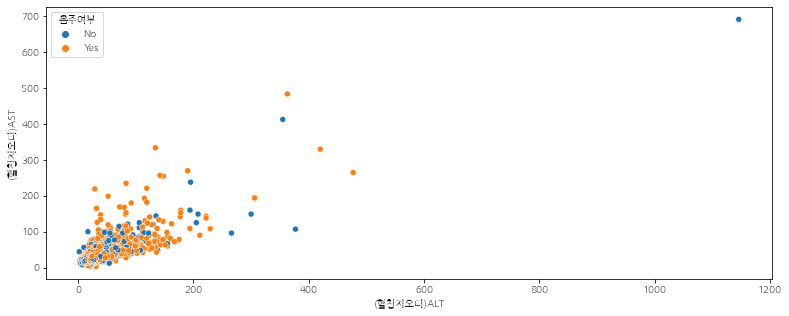

In [ ]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data = hth, x = '(혈청지오티)ALT', y = '(혈청지오티)AST', hue = '음주여부')

(0.0, 40.0)

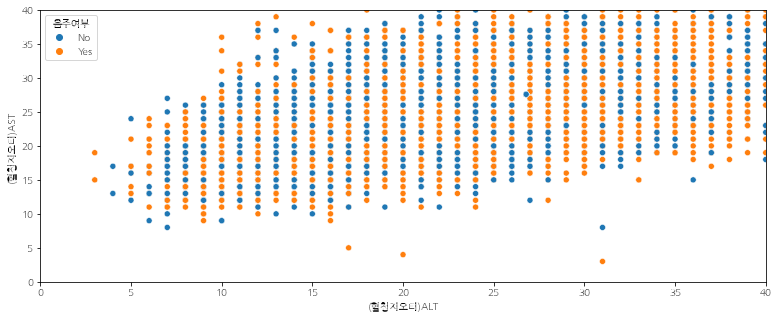

In [ ]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data = hth, x = '(혈청지오티)ALT', y = '(혈청지오티)AST', hue = '음주여부')
plt.xlim([0, 40])
plt.ylim([0, 40])

(41.0, 150.0)

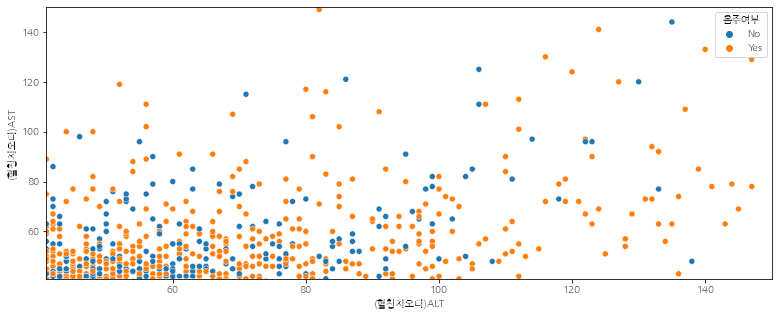

In [ ]:
plt.figure(figsize=(13, 5))
sns.scatterplot(data = hth, x = '(혈청지오티)ALT', y = '(혈청지오티)AST', hue = '음주여부')
plt.xlim([41, 150])
plt.ylim([41, 150])

#### 혈청지오티(ALT, AST)의 범위가 정상범위(0~40)가 아닌 경우, 정상범위와 비교했을 때, 비음주자보다 음주자의 비율이 높다는 것을 알 수 있다. 따라서 음주여부는 혈청지오티(ALT, AST)에 직접적인 영향을 미치며 혈청지오티(ALT, AST)의 범위를 정상범위로 들게하기 위해서는 음주를 가급적 피해야한다.

## 2. 혈청크레아티닌과 요단백의 상관관계

(0.5, 2.0)

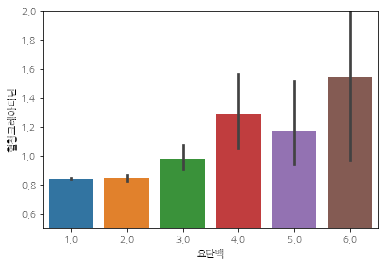

In [ ]:
sns.barplot(data = hth, x = '요단백', y = '혈청크레아티닌')
plt.ylim(0.5, 2)

(0.0, 2.0)

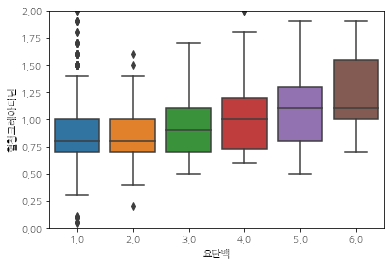

In [ ]:
sns.boxplot(data = hth, x = '요단백', y = '혈청크레아티닌')
plt.ylim(0,2)

#### 요단백은 혈액에 단백질에 섞여나오는 것을 말하며 1이 음성(-)으로 정상이고 2는±이며 3이상부터 양성(+)으로 비정상이다. 소변검사를 할 때마다 계속 단백뇨가 나오는 경우를 '지속적인 단백뇨'라고 하는데 혈액 검사 방법은 혈중 요소 질소 농도와 혈청 크레아티닌을 통해 사구체 여과율을 추정하여 콩팥의 기능을 평가함으로써 검사를 실시한다. 위의 막대그래프와 상자그림을 보았을 때, 요단백이 수치가 높아질수록 혈청 크레아티닌의 수치도 높아지는 것을 확인할 수 있다. 고로 혈청크레아티닌의 수치가 낮을수록 요단백에 걸릴 확률이 낮아지므로 요단백을 예방하기 위해 운동과 근육의 발육이 중요하다. 

##3. 음주/흡연과 식전혈당(공복혈당)의 상관관계

(100.0, 110.0)

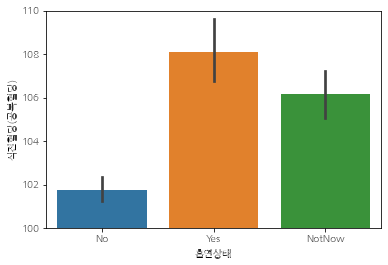

In [ ]:
sns.barplot(data = hth, x = '흡연상태', y = '식전혈당(공복혈당)')
plt.ylim(100,110)

(102.0, 105.5)

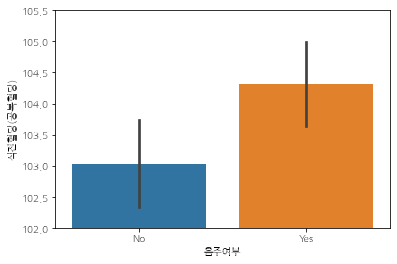

In [ ]:
sns.barplot(data = hth, x = '음주여부', y = '식전혈당(공복혈당)')
plt.ylim(102,105.5)

#### 음주자의 공복혈당이 비음주자의 공복혈당보다 높다. 흡연자의 공복혈당이 비흡연자와 과거흡연자&현재비흡연자의 공복혈당보다 높다. 과거흡연자&현재비흡연자의 공복혈당이 비흡연자의 공복혈당보다 높은 것을 막대그래프를 통해 알 수 있다. 공복혈당을 낮추기 위해서는 음주와 흡연을 가급적 멀리해야한다. 또한 음주보다 흡연이 공복혈당과 직접적인 상관관계가 있는 것을 알 수 있다.